# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **23.10.2023**

Мягкий дедлайн: **08.11.23 23:59**

Жесткий дедлайн: **12.11.23 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

$$\nabla_w Q(w)=\frac{2}{\ell}X^\top(Xw-y)$$

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam_meme.png)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/54610/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**: https://contest.yandex.ru/contest/54610/run-report/95391778/


* **StochasticDescent**: https://contest.yandex.ru/contest/54610/run-report/95391815/


* **MomentumDescent**: https://contest.yandex.ru/contest/54610/run-report/95391854/


* **Adam**: https://contest.yandex.ru/contest/54610/run-report/95391868/


* **LinearRegression**: https://contest.yandex.ru/contest/54610/run-report/95391896/

**Ник:** iadrobyshevskiy

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = 14, 5

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
categorical = ['brand', 'model', 'vehicleType',	'gearbox',	'fuelType',	'notRepairedDamage']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = []

<AxesSubplot: xlabel='price', ylabel='Count'>

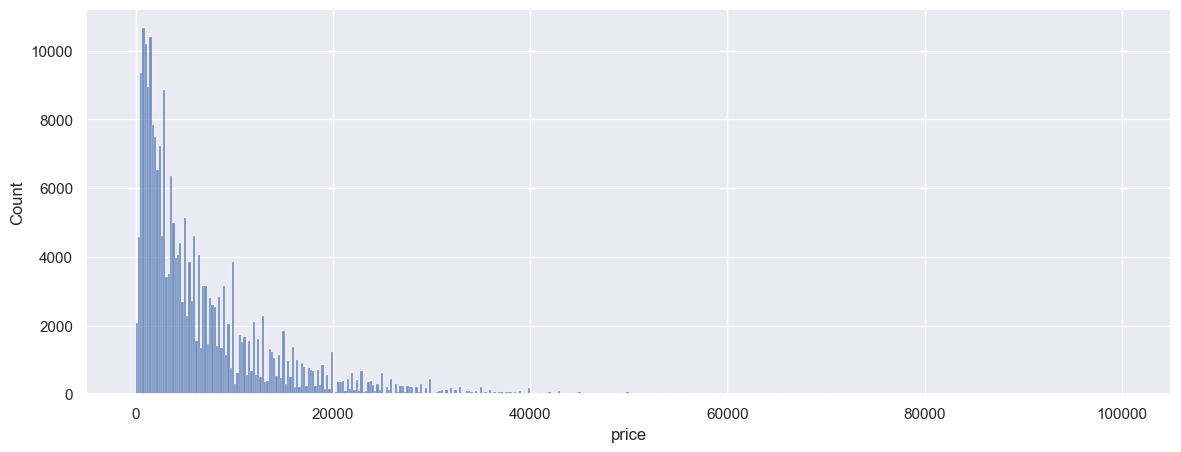

In [10]:
sns.histplot(data['price'])

Ну что-то не очень

<AxesSubplot: xlabel='price', ylabel='Count'>

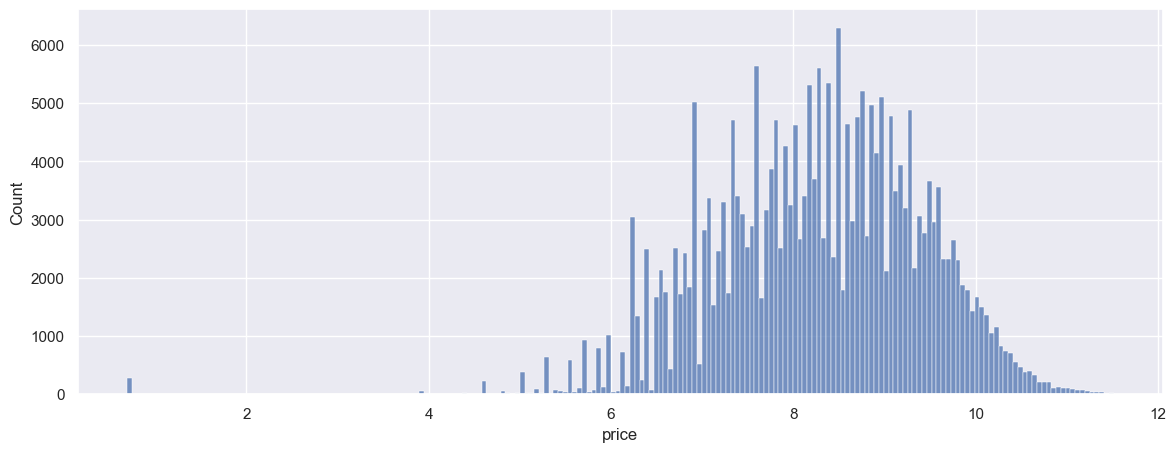

In [11]:
sns.histplot(np.log1p(data['price']))

А это уже похоже на нормальное распределение, так что давайте использовать его.

In [12]:
data['log_price'] = np.log1p(data['price'])

Давайте посмотрим, начиная с какого значения начинаются выбросы(смотрим boxplot)

<AxesSubplot: xlabel='log_price'>

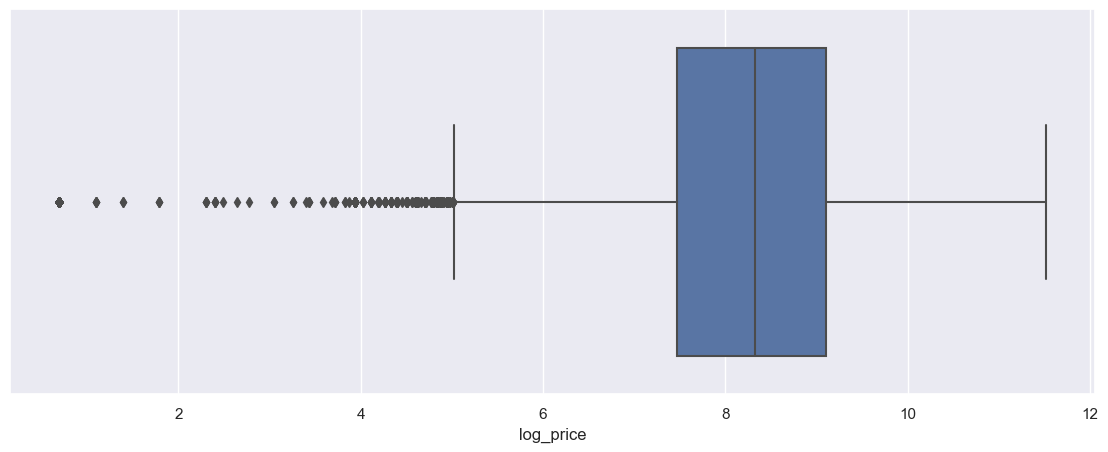

In [13]:
sns.boxplot(x=data['log_price'])

Видно, что это начинается где-то около 5

In [14]:
data = data[data['log_price']>=5]

<AxesSubplot: xlabel='log_price', ylabel='Count'>

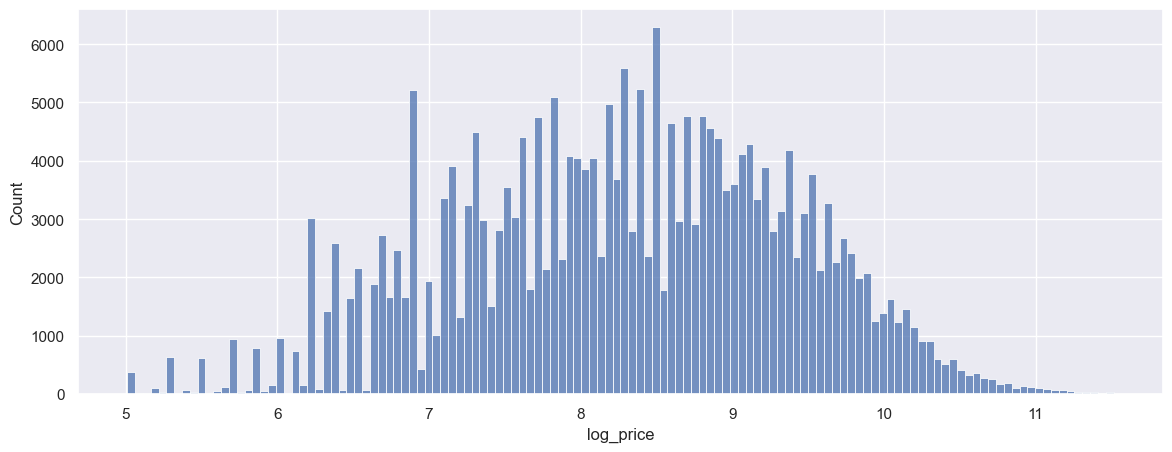

In [15]:
sns.histplot(data['log_price'])

Стало симпотичнее

/var/folders/cg/4dwrqr410kd9090hdvh9_n7w0000gn/T/ipykernel_52587/3879478677.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=45, size=7)


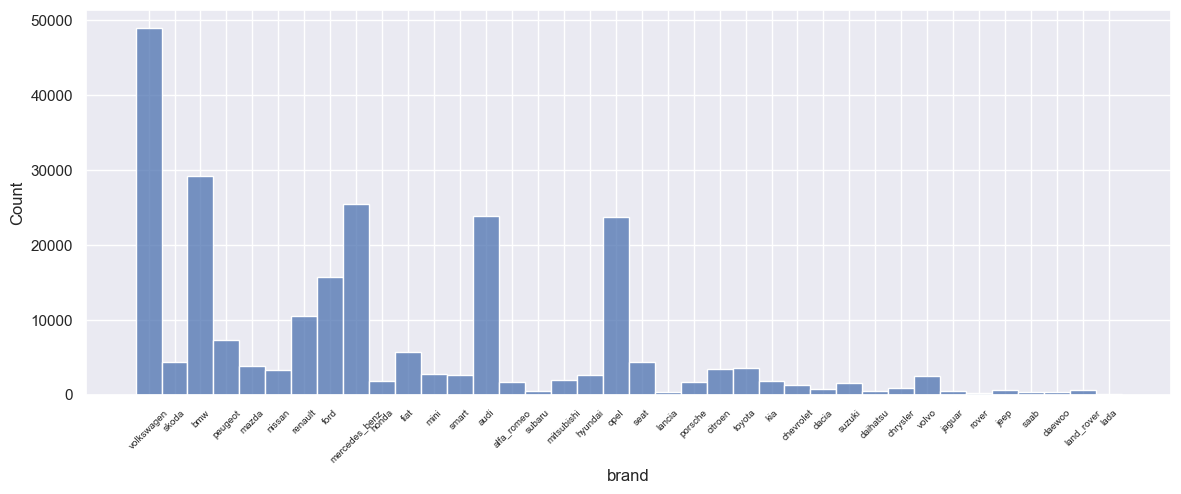

In [16]:
g = sns.histplot(data['brand'])
g.set_xticklabels(g.get_xticklabels(), rotation=45, size=7)
plt.show()

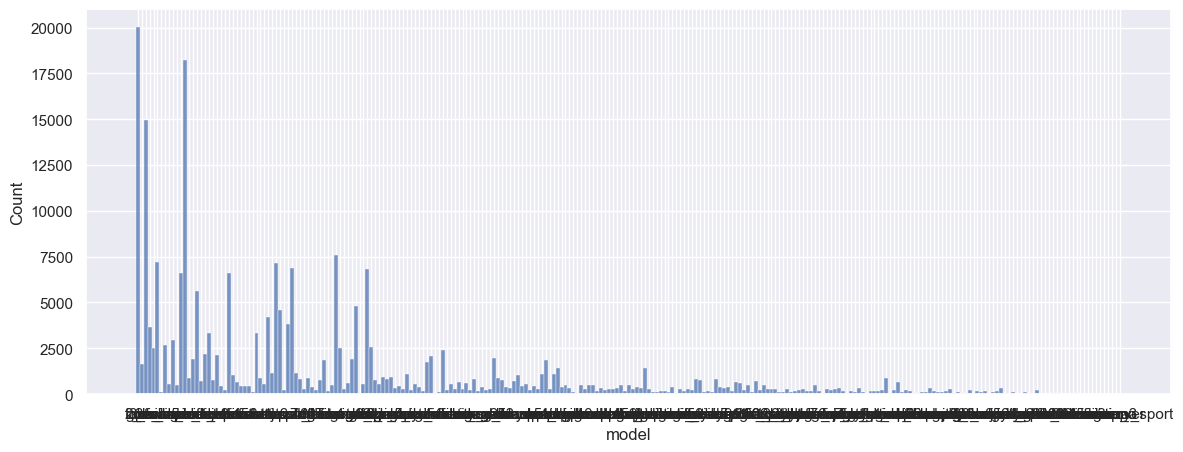

In [17]:
g = sns.histplot(data['model'])
plt.show()

Тут уже пофиксить ticks мне не удалось.

Из замечаний можно отметить, что очень уж дофига моделей, объявлений которых достаточно не много

In [18]:
data['model'].value_counts().tail(15)

9000               21
musa               17
charade            13
materia            12
move               11
kappa              10
200                 9
kalina              5
i3                  5
elefantino          3
rangerover          3
serie_3             3
serie_2             3
samara              2
discovery_sport     1
Name: model, dtype: int64

In [19]:
data[data['model'] == '911']

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,log_price
903,porsche,911,coupe,automatik,benzin,nein,301,150000,220,17500,9.770013
970,porsche,911,coupe,manuell,benzin,nein,320,70000,165,42900,10.666650
1850,porsche,911,coupe,manuell,benzin,nein,179,150000,442,35000,10.463132
2287,porsche,911,cabrio,automatik,benzin,nein,250,150000,272,41964,10.644591
2524,porsche,911,cabrio,automatik,benzin,nein,385,50000,62,75600,11.233225
...,...,...,...,...,...,...,...,...,...,...,...
239768,porsche,911,cabrio,automatik,benzin,nein,320,80000,159,33911,10.431524
239839,porsche,911,coupe,manuell,benzin,nein,179,150000,447,39500,10.584081
240236,porsche,911,coupe,manuell,benzin,nein,300,150000,257,49900,10.817796
240600,porsche,911,coupe,manuell,benzin,nein,325,90000,113,44950,10.713328


Это я к чему: можно было б выкинуть те модели, объявлений которых представлено менее 500.

Либо же взять какое-то количество(условно 100) самых популярных моделей, и как в прошлой домашке занумировать их номерами от 1 до 100, а остальным поставить 0

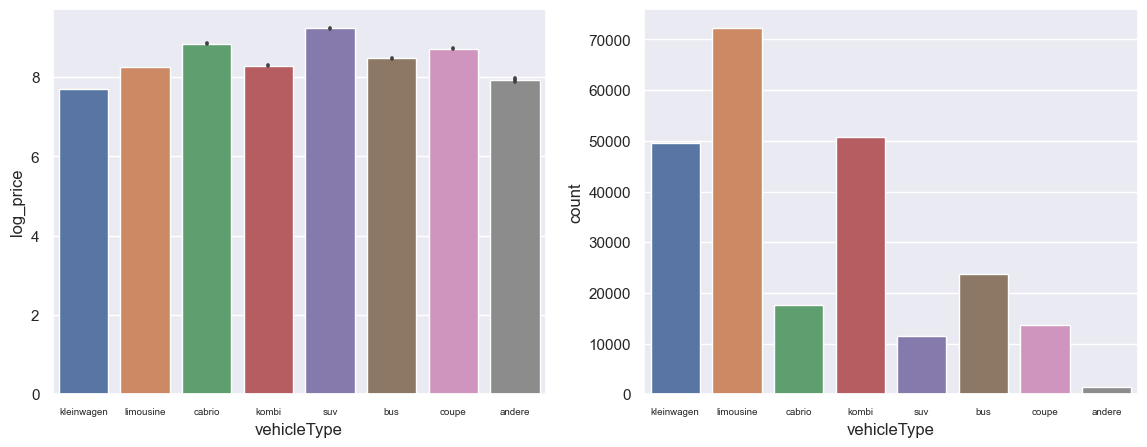

In [20]:
fig, axes = plt.subplots(1,2)
sns.barplot(data, x='vehicleType', y='log_price',ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), size=7)
sns.countplot(data, x='vehicleType', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), size=7)
plt.show()

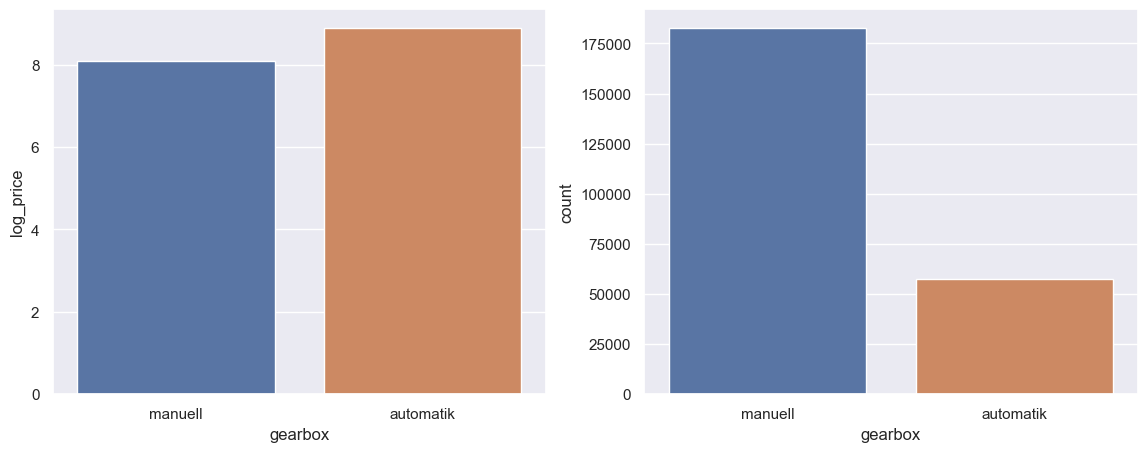

In [21]:
fig, axes = plt.subplots(1,2)
sns.barplot(data, x='gearbox', y='log_price',ax=axes[0])
# axes[0].set_xticklabels(axes[0].get_xticklabels(), size=7)
sns.countplot(data, x='gearbox', ax=axes[1])
# axes[1].set_xticklabels(axes[1].get_xticklabels(), size=7)
plt.show()

Видим, что машин с 'автоматом' раза в три меньше, чем механик, и стоят они на порядок больше

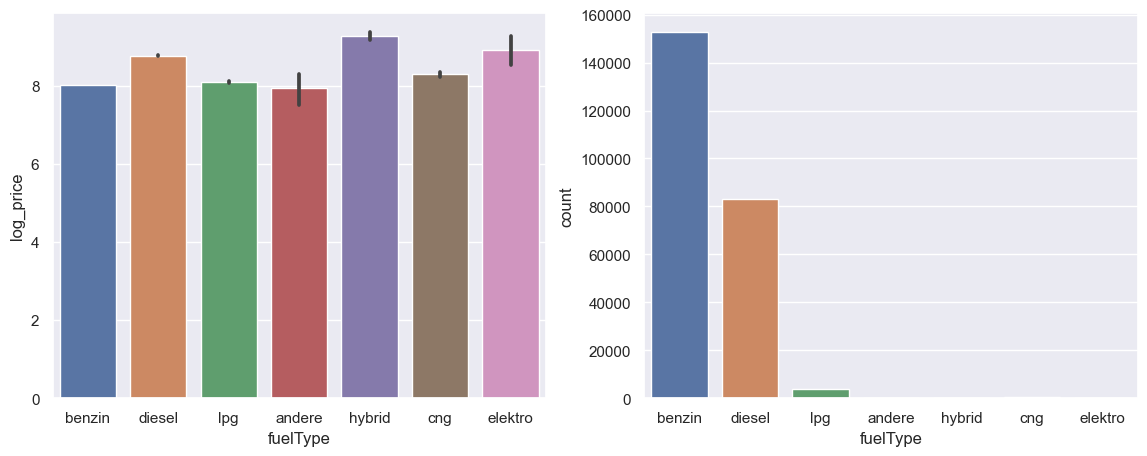

In [22]:
fig, axes = plt.subplots(1,2)
sns.barplot(data, x='fuelType', y='log_price',ax=axes[0])
# axes[0].set_xticklabels(axes[0].get_xticklabels(), size=7)
sns.countplot(data, x='fuelType', ax=axes[1])
# axes[1].set_xticklabels(axes[1].get_xticklabels(), size=7)
plt.show()

Эх, электрички даже тут сосут(ладно, этому датасету 6+ лет)

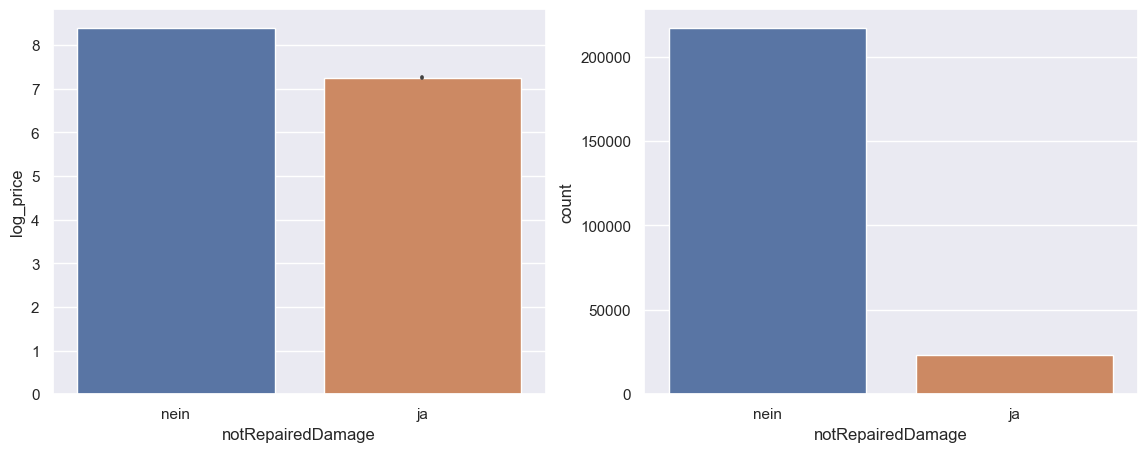

In [23]:
fig, axes = plt.subplots(1,2)
sns.barplot(data, x='notRepairedDamage', y='log_price',ax=axes[0])
# axes[0].set_xticklabels(axes[0].get_xticklabels(), size=7)
sns.countplot(data, x='notRepairedDamage', ax=axes[1])
# axes[1].set_xticklabels(axes[1].get_xticklabels(), size=7)
plt.show()

<AxesSubplot: xlabel='notRepairedDamage', ylabel='log_price'>

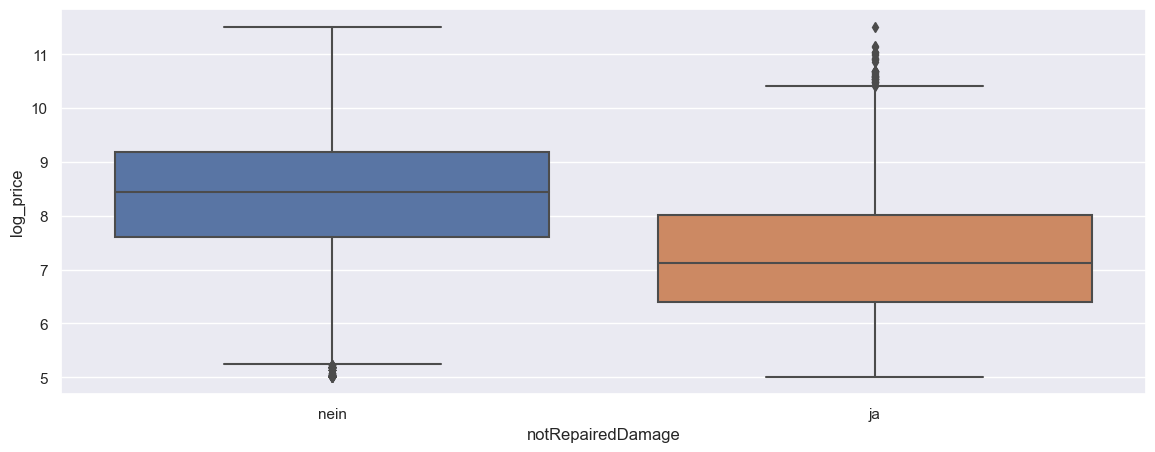

In [24]:
sns.boxplot(data, x='notRepairedDamage', y='log_price')

Графики показывают одно и то же, но последний мне нравится больше.

Здоровые машины стоят больше

Если подытожить с категориальными признакми, то можно сказать, что каждый признак по-своему важен и я предпочту с ними не играться(хотя с моделью всё же можно)

Теперь рассмотрим количественные признаки: будем бить значения на промежутки и смотреть, как меняется цена(а точнее её логарифм)

/var/folders/cg/4dwrqr410kd9090hdvh9_n7w0000gn/T/ipykernel_52587/30694585.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=7, rotation=30)


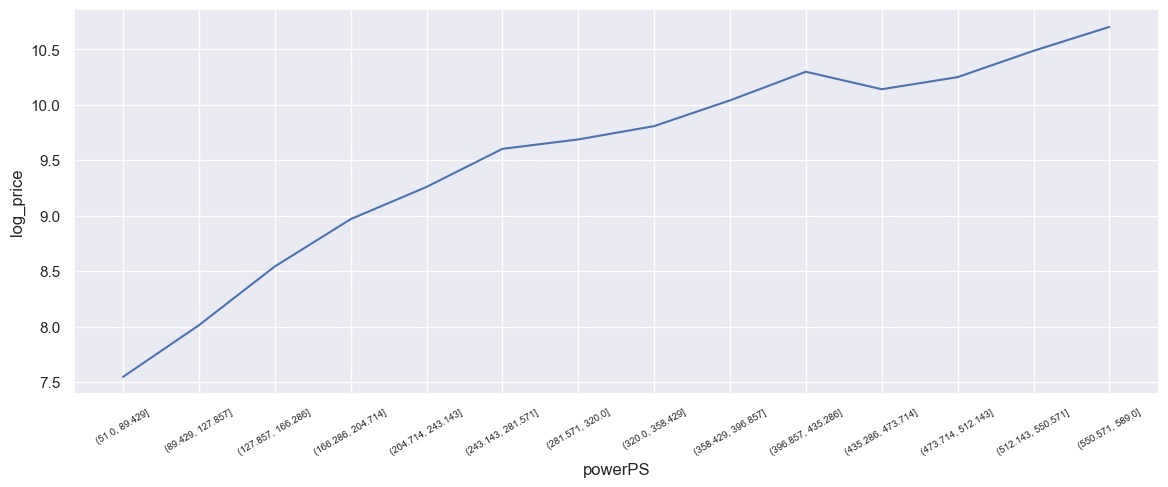

In [25]:
tmp = data.groupby(pd.cut(data['powerPS'], np.linspace(data['powerPS'].min(), data['powerPS'].max(), 15)))['log_price'].mean().reset_index().astype({'powerPS':'str'})
g = sns.lineplot(tmp, x='powerPS', y='log_price')
g.set_xticklabels(g.get_xticklabels(), size=7, rotation=30)
plt.show()

Видим, что чем больше мощность, тем больше цена. Есть небольшие падения цены, но это скорее всего из-за плоховыбранного разбиения

/var/folders/cg/4dwrqr410kd9090hdvh9_n7w0000gn/T/ipykernel_52587/2805571088.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=7, rotation=30)


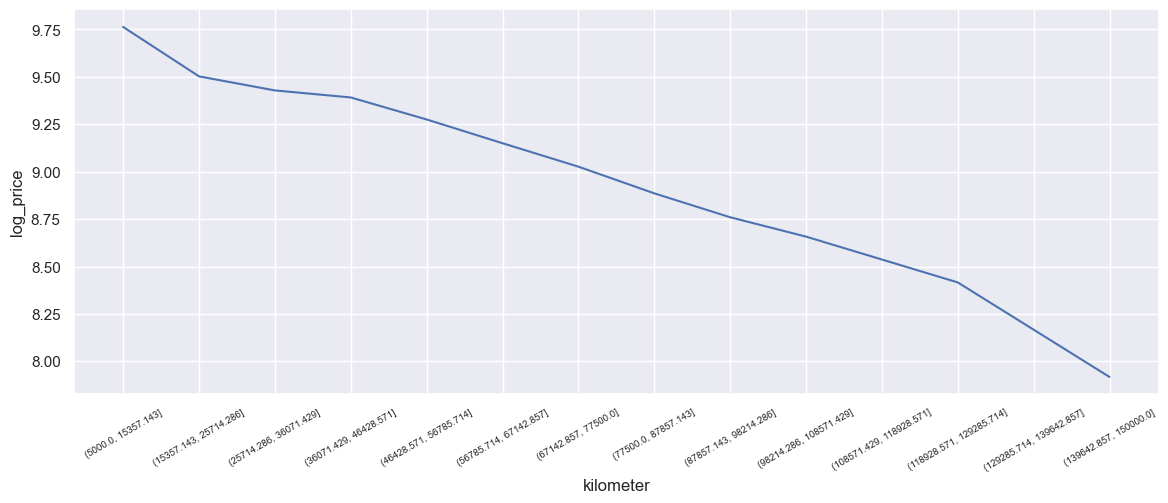

In [26]:
tmp = data.groupby(pd.cut(data['kilometer'], np.linspace(data['kilometer'].min(), data['kilometer'].max(), 15)))['log_price'].mean().reset_index().astype({'kilometer':'str'})
g = sns.lineplot(tmp, x='kilometer', y='log_price')
g.set_xticklabels(g.get_xticklabels(), size=7, rotation=30)
plt.show()

Чем больше пробег, тем меньше цена на автомобиль

/var/folders/cg/4dwrqr410kd9090hdvh9_n7w0000gn/T/ipykernel_52587/4097623937.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), size=7, rotation=30)


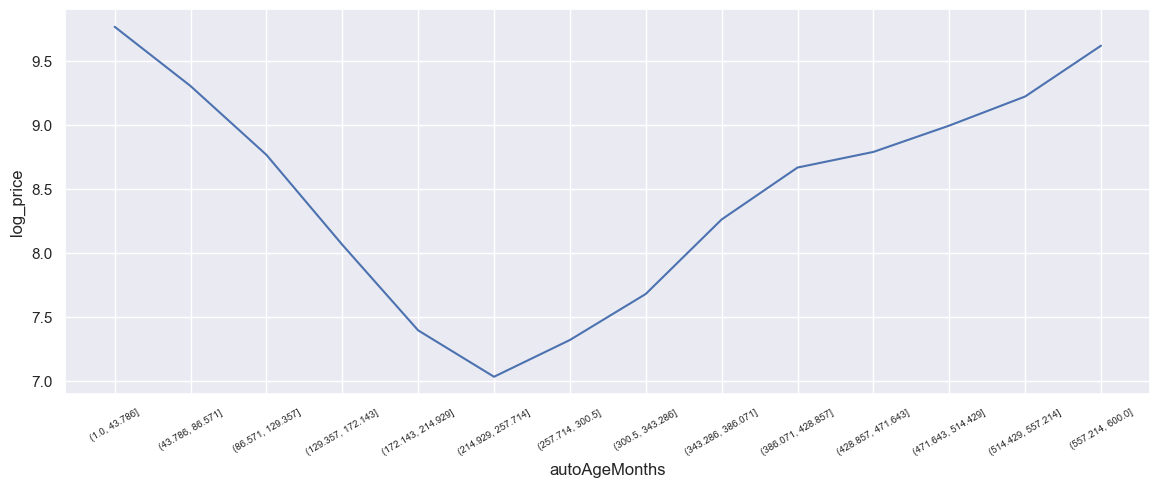

In [27]:
tmp = data.groupby(pd.cut(data['autoAgeMonths'], np.linspace(data['autoAgeMonths'].min(), data['autoAgeMonths'].max(), 15)))['log_price'].mean().reset_index().astype({'autoAgeMonths':'str'})
g = sns.lineplot(tmp, x='autoAgeMonths', y='log_price')
g.set_xticklabels(g.get_xticklabels(), size=7, rotation=30)
plt.show()

Чем больше лет машине, тем менее на неё цена. Но по истечению $\approx$ 20 лет цена начинает рости, потому что автомобиль переходит в класс редки(типа ретро)

In [28]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']

In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/9, random_state=110)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [31]:
from sklearn.metrics import r2_score
from tqdm import tqdm

In [32]:
results = {}
loss_history = {}

for descent_name in tqdm(['full', 'stochastic', 'momentum', 'adam']):
    curr_loss = 228228228228228228
    best_lamdba = None
    lambda_grid = np.logspace(-8, 1, 15)
    for lambda_ in lambda_grid:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'lambda_':  lambda_
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_val, y_val.to_numpy())
        loss = regression.calc_loss(X_val, y_val.to_numpy())
        if loss < curr_loss:
            best_lamdba = lambda_
            curr_loss = loss
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'lambda_':  best_lamdba
            }
        }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train.to_numpy())
    results[descent_name] = {'train_mse':regression.calc_loss(X_train, y_train.to_numpy()),
                             'test_mse':regression.calc_loss(X_test, y_test.to_numpy()),
                             'train_r2_score':r2_score(regression.predict(X_train), y_train.to_numpy()),
                             'test_r2_score':r2_score(regression.predict(X_test), y_test.to_numpy()),
                             'num_iter':len(regression.loss_history) - 1,
                             'lambda':best_lamdba}
    loss_history[descent_name] = regression.loss_history

  0%|          | 0/4 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/free001style/HSE/ML/gd/descents.py:79: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(self.predict(x) - y))
 25%|██▌       | 1/4 [00:00<00:02,  1.15it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/free001style/HSE/ML/gd/descents.py:79: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(self.predict(x) - y))
 50%|█████     | 2/4 [00:01<00:01,  1.43it/s]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out

In [33]:
pd.DataFrame(results)

,full,stochastic,momentum,adam
train_mse,0.382319,0.341856,0.299921,0.261595
test_mse,0.381914,0.340647,0.299163,0.261079
train_r2_score,0.625932,0.626258,0.672369,0.731061
test_r2_score,0.625828,0.626112,0.672648,0.732180
num_iter,39.000000,275.000000,91.000000,147.000000
lambda,0.517947,0.517947,0.517947,2.275846


### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'MSE')]

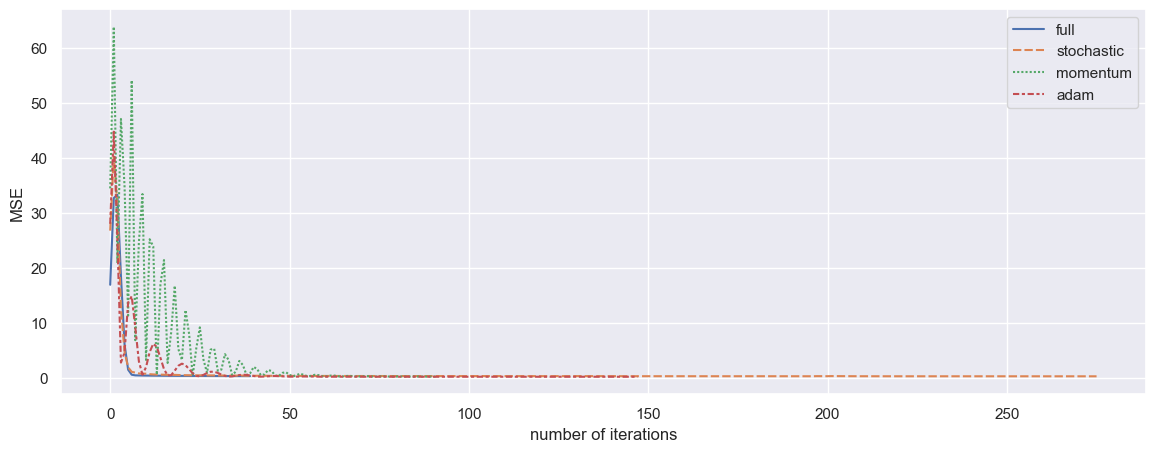

In [34]:
sns.lineplot(loss_history).set(xlabel='number of iterations', ylabel='MSE')

**Ответ:** Лучше всего в плане MSE и $R^2$ себя показывает Adam, после него идёт momentum, который учится быстрее(на самом деле, если смотреть на разность ошибок на прошлом и текущем шагах, то Adam сходится гораздо быстрее), но с ошибка у него не так хорошо убывает. Градиентный спуск сходится быстрее всего, но как мы знаем, считать градиент по всей выборке -- это не лучшай идея и на практике так редко делают. Ещё можно отметить, что SGD не уложился в max_iter(что в целом логично)

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [35]:
from time import time

batch_sizes = np.arange(5, 500, 10)
k = 10

aver_times = []
aver_num_iters = []

for batch_size in tqdm(batch_sizes):
    aver_time = 0
    aver_num_iter = 0
    for _ in range(k):
        descent_config = {
                'descent_name': 'stochastic',
                'kwargs': {
                    'dimension': X_train.shape[1],
                    'lambda_':  results['stochastic']['lambda'],
                    'batch_size': batch_size
                }
            }
        regression = LinearRegression(descent_config=descent_config)
        start = time()
        regression.fit(X_train, y_train.to_numpy())
        finish = time()
        aver_time += (finish - start)
        aver_num_iter += (len(regression.loss_history) - 1)
    aver_times.append(aver_time / k)
    aver_num_iters.append(aver_num_iter / k)


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [01:20<00:00,  1.61s/it]


[Text(0.5, 0, 'batch size'), Text(0, 0.5, 'average number of iterations')]

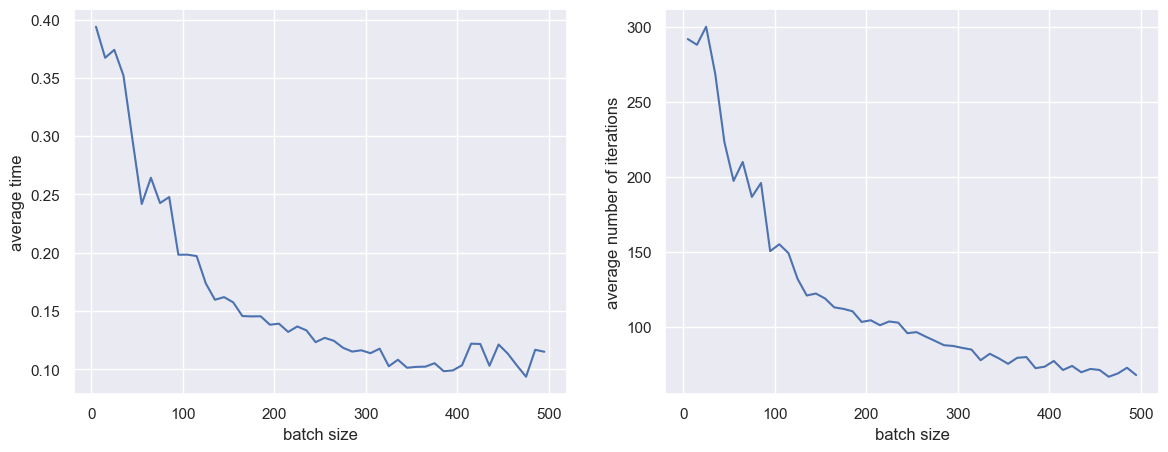

In [36]:
fig, axes = plt.subplots(1,2)
sns.lineplot(x=batch_sizes, y=aver_times, ax=axes[0])
axes[0].set(xlabel='batch size', ylabel='average time')
sns.lineplot(x=batch_sizes, y=aver_num_iters, ax=axes[1])
axes[1].set(xlabel='batch size', ylabel='average number of iterations')

**Ответ:** Видим, что при росте размера батча, падет и количество итераций, и время на сходимость. Размер батча 500 -- это ничто по сравнению с большой выборкой, поэтому если бы мы взяли батчи заметно больше, то время на их потсчёт росло бы.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/54610/run-report/95391923/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [37]:
results_reg = {}
loss_history_reg = {}

for descent_name in tqdm(['full', 'stochastic', 'momentum', 'adam']):
    curr_loss = 228228228228228228
    best_lamdba = None
    best_mu = None
    lambda_grid = np.logspace(-8, 1, 15)
    mu_grid = np.logspace(-5, 0.5, 10)
    for lambda_ in lambda_grid:
        for mu in mu_grid:
            descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': X_val.shape[1],
                    'lambda_':  lambda_,
                    'mu': mu
                }
            }
            regression = LinearRegression(descent_config=descent_config)
            regression.fit(X_val, y_val.to_numpy())
            loss = regression.calc_loss(X_val, y_val.to_numpy())
            if loss < curr_loss:
                best_lamdba = lambda_
                best_mu = mu
                curr_loss = loss
    descent_config = {
                'descent_name': descent_name,
                'regularized': True,
                'kwargs': {
                    'dimension': X_val.shape[1],
                    'lambda_':  best_lamdba,
                    'mu': best_mu
                }
            }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train.to_numpy())
    results_reg[descent_name] = {'train_mse':regression.calc_loss(X_train, y_train.to_numpy()),
                             'test_mse':regression.calc_loss(X_test, y_test.to_numpy()),
                             'train_r2_score':r2_score(regression.predict(X_train), y_train.to_numpy()),
                             'test_r2_score':r2_score(regression.predict(X_test), y_test.to_numpy()),
                             'num_iter':len(regression.loss_history) - 1,
                             'lambda':best_lamdba,
                             'mu': best_mu}
    loss_history_reg[descent_name] = regression.loss_history

  0%|          | 0/4 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/free001style/HSE/ML/gd/descents.py:79: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(self.predict(x) - y))
 25%|██▌       | 1/4 [00:07<00:22,  7.48s/it]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/Users/free001style/HSE/ML/gd/descents.py:79: RuntimeWarning: overflow encountered in square
  return np.mean(np.square(self.predict(x) - y))
 50%|█████     | 2/4 [00:10<00:09,  4.78s/it]/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:180: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out

In [38]:
pd.DataFrame(results), pd.DataFrame(results_reg)

(                     full  stochastic   momentum        adam
 train_mse        0.382319    0.341856   0.299921    0.261595
 test_mse         0.381914    0.340647   0.299163    0.261079
 train_r2_score   0.625932    0.626258   0.672369    0.731061
 test_r2_score    0.625828    0.626112   0.672648    0.732180
 num_iter        39.000000  275.000000  91.000000  147.000000
 lambda           0.517947    0.517947   0.517947    2.275846,
                       full  stochastic    momentum        adam
 train_mse         0.327318    0.327995    0.282715    0.261534
 test_mse          0.325325    0.326915    0.280759    0.260771
 train_r2_score    0.640333    0.669902    0.695904    0.731535
 test_r2_score     0.641340    0.670962    0.697528    0.732910
 num_iter        206.000000  300.000000  212.000000  175.000000
 lambda            0.517947    0.517947    0.517947    2.275846
 mu                0.046416    0.046416    0.011365    0.000010)

In [39]:
all_loss_history = {}
for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    all_loss_history[descent_name] = {'with regularization':loss_history_reg[descent_name], 'without regularization':loss_history[descent_name]}

[Text(0.5, 0, 'number of iteration'), Text(0, 0.5, 'MSE')]

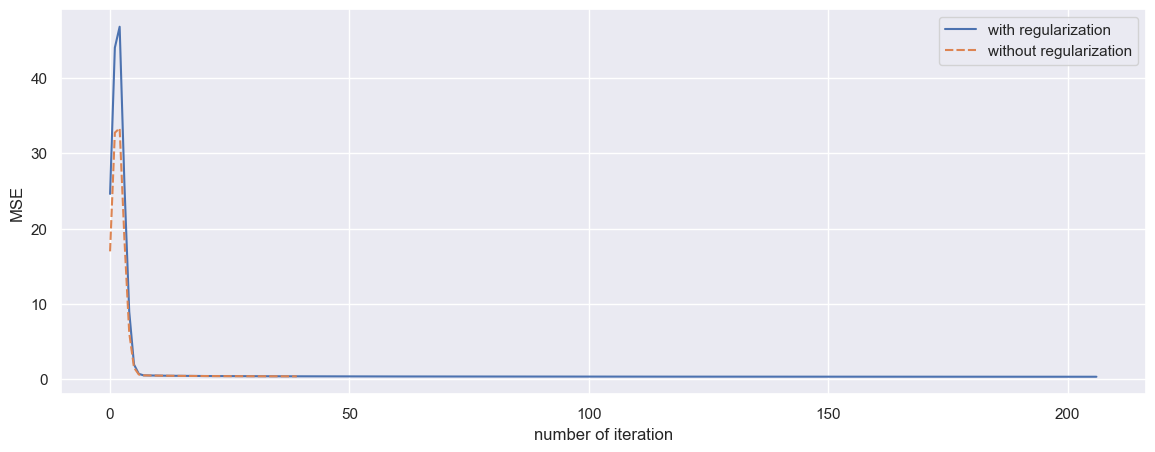

In [40]:
sns.lineplot(all_loss_history['full']).set(xlabel='number of iteration', ylabel='MSE')

[Text(0.5, 0, 'number of iteration'), Text(0, 0.5, 'MSE')]

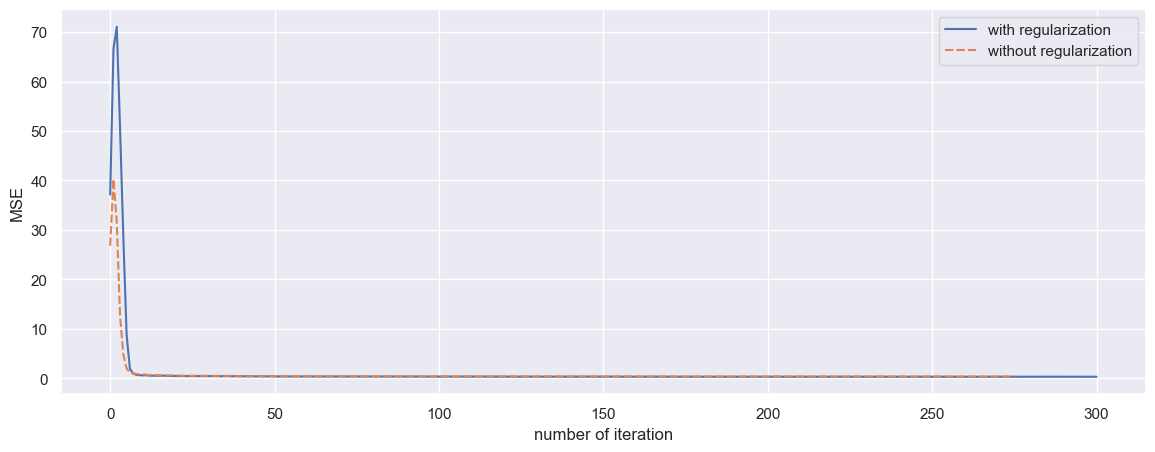

In [41]:
sns.lineplot(all_loss_history['stochastic']).set(xlabel='number of iteration', ylabel='MSE')

[Text(0.5, 0, 'number of iteration'), Text(0, 0.5, 'MSE')]

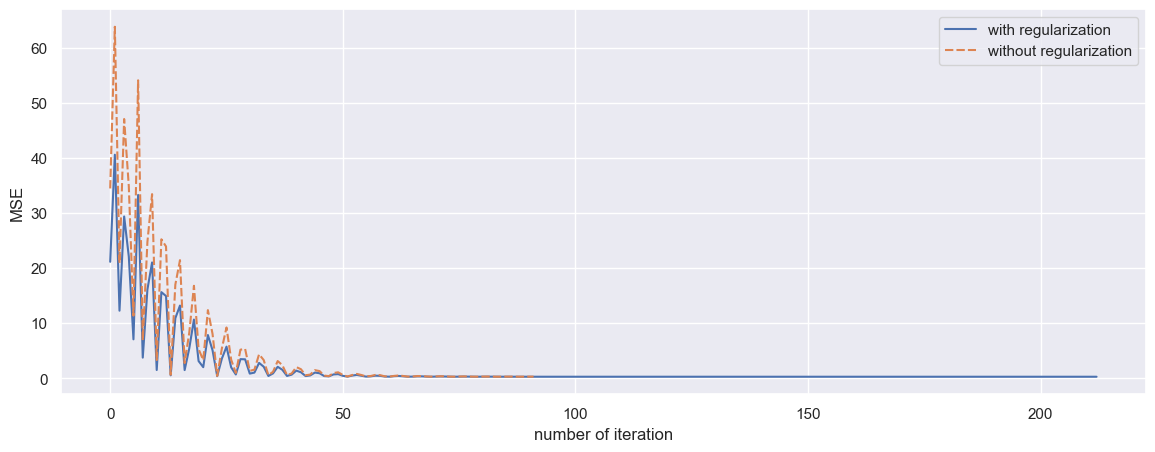

In [42]:
sns.lineplot(all_loss_history['momentum']).set(xlabel='number of iteration', ylabel='MSE')

[Text(0.5, 0, 'number of iteration'), Text(0, 0.5, 'MSE')]

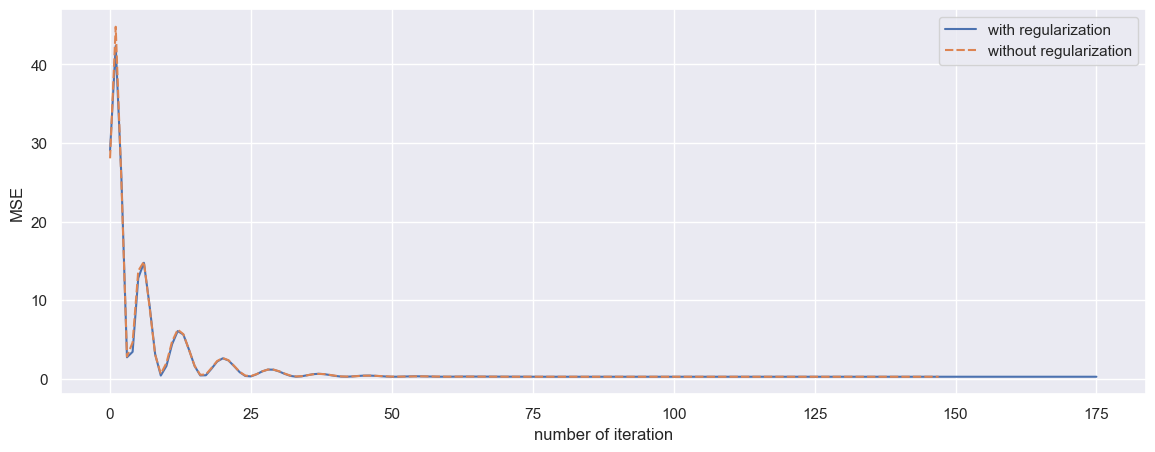

In [43]:
sns.lineplot(all_loss_history['adam']).set(xlabel='number of iteration', ylabel='MSE')

**Ответ:** Число итераций для каждого из методов увеличилось. Регуляризация помогла хорошо снизить MSE на тесте для full и SGD, для adam и momentum ошибка почти не изменилась. Из графиков видно, что сходимость либо почти не изменилась, либо ошибка стала падать медленнее. Происходит это из-за того, что мы накладываем дополнительные ограничения на функцию, которую хотим оптимизировать

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$Q(w) = \frac{1}{\ell}\sum_{i=1}^\ell\log(\cosh(x_iw-y_i))\implies\frac{\partial Q}{\partial w}=\frac{1}{\ell}\sum_{i=1}^\ell\frac{\sinh(x_iw-y_i)}{\cosh(x_iw-y_i)}\cdot x_i=\frac{1}{\ell}\sum_{i=1}^\ell\th(x_iw-y_i)\cdot x_i=\frac{1}{\ell}X^\top\th(Xw-y)$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Пример того, как можно запрограммировать использование нескольких функций потерь внутри одного класса градиентного спуска:


```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

In [44]:
from descents import LossFunction

results_log_cosh = {}
loss_history_log_cosh = {}

for descent_name in tqdm(['full', 'stochastic', 'momentum', 'adam']):
    curr_loss = 228228228228228228
    best_lamdba = None
    lambda_grid = np.logspace(-8, 1, 15)
    for lambda_ in lambda_grid:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.LogCosh,
                'lambda_':  lambda_
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_val, y_val.to_numpy())
        loss = regression.calc_loss(X_val, y_val.to_numpy())
        if loss < curr_loss:
            best_lamdba = lambda_
            curr_loss = loss
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.LogCosh,
                'lambda_':  best_lamdba
            }
        }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train.to_numpy())
    results_log_cosh[descent_name] = {'train_log_cosh':regression.calc_loss(X_train, y_train.to_numpy()),
                             'test_log_cosh':regression.calc_loss(X_test, y_test.to_numpy()),
                             'train_r2_score':r2_score(regression.predict(X_train), y_train.to_numpy()),
                             'test_r2_score':r2_score(regression.predict(X_test), y_test.to_numpy()),
                             'num_iter':len(regression.loss_history) - 1,
                             'lambda':best_lamdba}
    loss_history_log_cosh[descent_name] = regression.loss_history

100%|██████████| 4/4 [00:09<00:00,  2.28s/it]


In [45]:
pd.DataFrame(results_log_cosh)

,full,stochastic,momentum,adam
train_log_cosh,0.119069,0.127046,0.111746,0.102663
test_log_cosh,0.118582,0.126699,0.111186,0.102446
train_r2_score,0.694617,0.693519,0.711026,0.738616
test_r2_score,0.695705,0.693502,0.712649,0.739917
num_iter,242.000000,300.000000,134.000000,229.000000
lambda,10.000000,10.000000,2.275846,10.000000


[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'Log-cosh')]

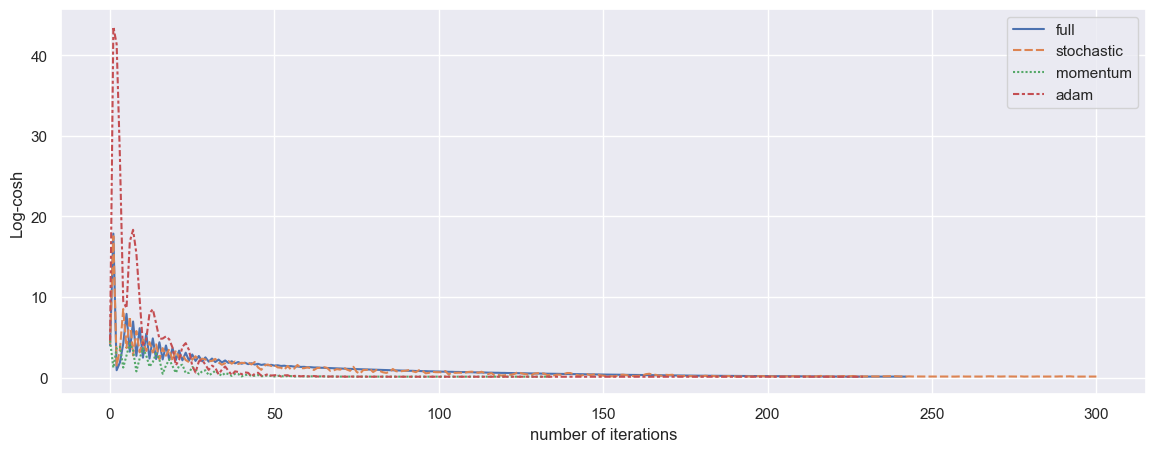

In [46]:
sns.lineplot(loss_history_log_cosh).set(xlabel='number of iterations', ylabel='Log-cosh')

Видим, что для каждого из методов $R^2$ повысился, как и количество итераций.

### Кулинарно-социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, время пробовать новое и делиться теплом с друзьями и близкими. Выберите рецепт, который соответствует вашему настроению, приготовьте выбранное блюдо и угостите хотя бы одного человека им. Кратко опишите ваши впечатления, прикрепите рецепт и фотографии блюда и довольного гостя.

- **Ингредиенты**:
    - говяжий фарш, упаковка мираторг по 500 грамм
    - 1 луковица 
    - соус barilla с базиликом(не реклама, реально кайфовая штука) 
    - травы: орегано, итальянские травы 
    - соль
1. Сначала чистим лук от шелухи и нарезаем его как можно мельче
2. Обжариваем лук около 5 минут на среднем огне, помешивая, он должен стать золотистым 
3. Выкладываем фарш и как можно мельче разбиваем его на сковородке лопаточкой, даём припечься с каждой стороны. В общей сложности минут 15, он должен полностью изменить цвет, не должно остаться красного вообще.
4. Добавляем barilla, перемешиваешь. Добавляем соль, травы, перемешиваем. Накрываем крышкой. Уменьшаем огонь до среднего. 
5. Далее готовим еще минут 50 (Минут через 20 уменьшаем еще огонь), перемешивая каждые 5-7 минут, пробуем на вкус, добавляем соль, травы по необходимости.

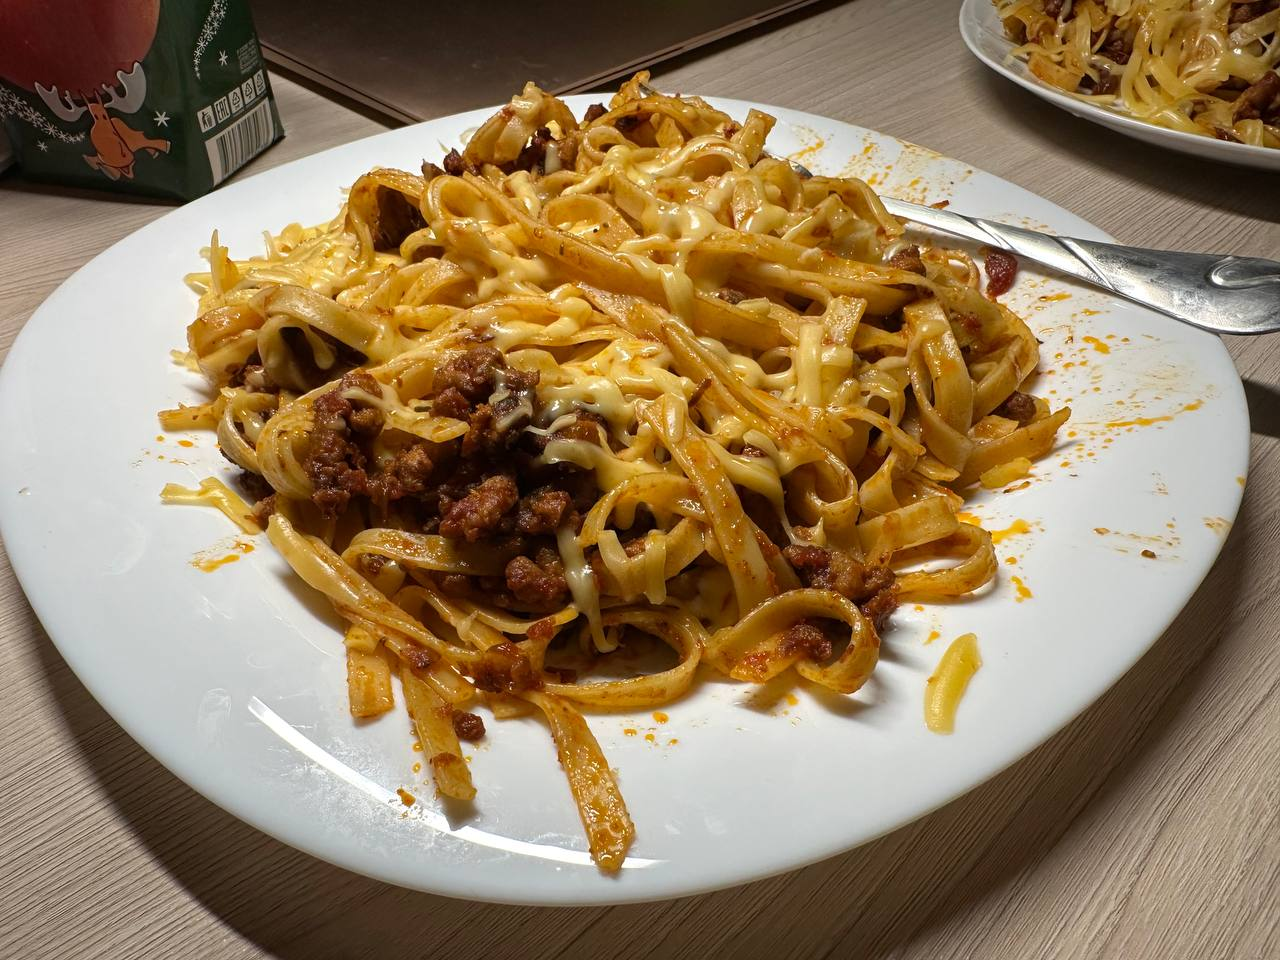
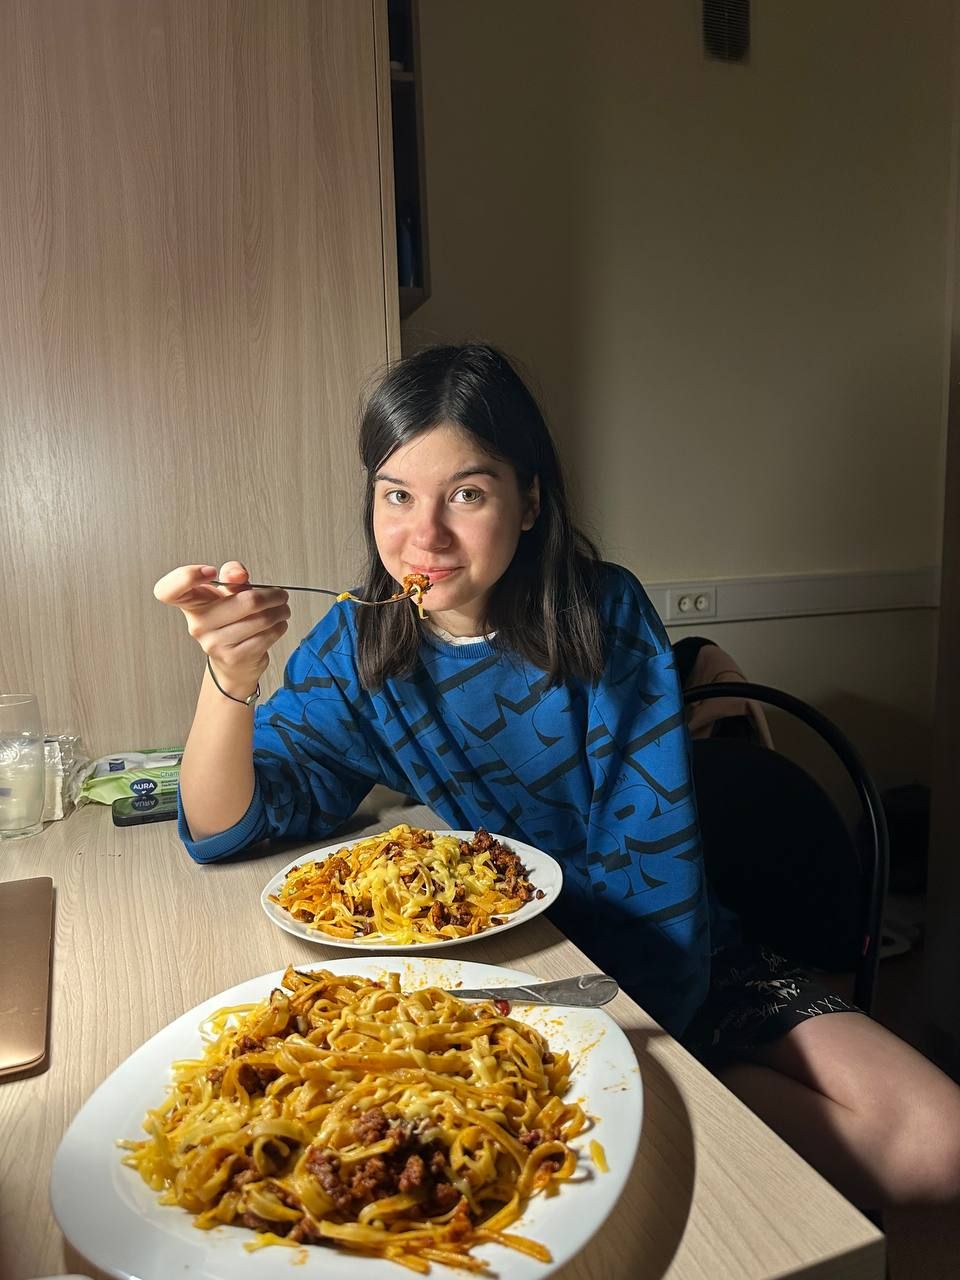

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [47]:
from descents import LossFunction

results_new_opt = {}
loss_history_new_opt = {}

for descent_name in tqdm(['full', 'stochastic', 'momentum', 'adam', 'adamax', 'nadam', 'amsgrad']):
    curr_loss = 228228228228228228
    best_lamdba = None
    lambda_grid = np.logspace(-8, 1, 30)
    for lambda_ in lambda_grid:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.LogCosh,
                'lambda_':  lambda_
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_val, y_val.to_numpy())
        loss = regression.calc_loss(X_val, y_val.to_numpy())
        if loss < curr_loss:
            best_lamdba = lambda_
            curr_loss = loss
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.LogCosh,
                'lambda_':  best_lamdba
            }
        }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train.to_numpy())
    results_new_opt[descent_name] = {'train_log_cosh':regression.calc_loss(X_train, y_train.to_numpy()),
                             'test_log_cosh':regression.calc_loss(X_test, y_test.to_numpy()),
                             'train_r2_score':r2_score(regression.predict(X_train), y_train.to_numpy()),
                             'test_r2_score':r2_score(regression.predict(X_test), y_test.to_numpy()),
                             'num_iter':len(regression.loss_history) - 1,
                             'lambda':best_lamdba}
    loss_history_new_opt[descent_name] = regression.loss_history

  0%|          | 0/7 [00:00<?, ?it/s]

100%|██████████| 7/7 [00:26<00:00,  3.73s/it]


In [48]:
pd.DataFrame(results_new_opt)

,full,stochastic,momentum,adam,adamax,nadam,amsgrad
train_log_cosh,0.119877,0.128423,0.107903,0.102661,0.102669,0.102785,0.102658
test_log_cosh,0.119113,0.126653,0.106922,0.102445,0.102468,0.102601,0.102429
train_r2_score,0.689882,0.671547,0.721385,0.738650,0.738746,0.738085,0.738319
test_r2_score,0.691569,0.674910,0.723706,0.739939,0.739992,0.739410,0.739635
num_iter,242.000000,300.000000,175.000000,260.000000,300.000000,197.000000,197.000000
lambda,10.000000,2.395027,4.893901,10.000000,0.280722,0.573615,10.000000


[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'Log-cosh')]

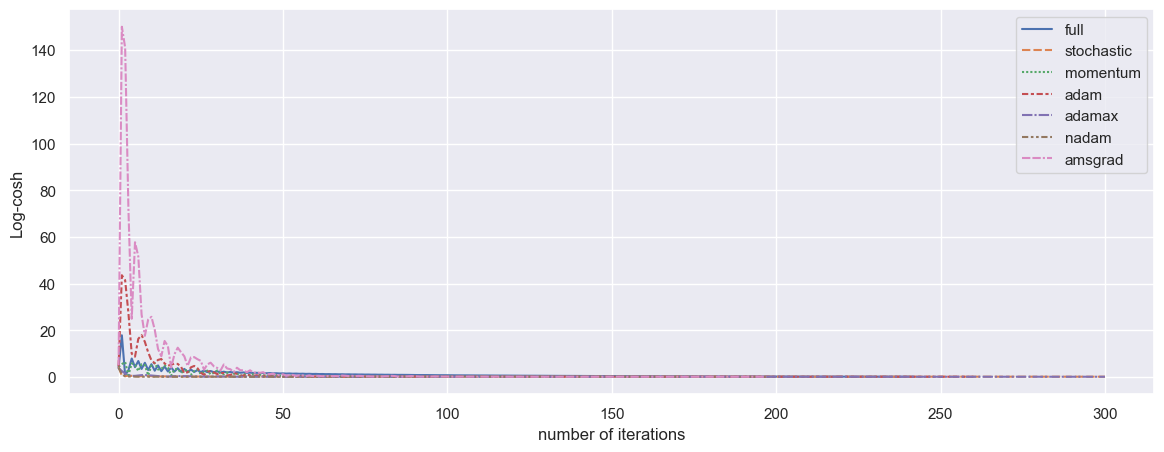

In [49]:
sns.lineplot(loss_history_new_opt).set(xlabel='number of iterations', ylabel='Log-cosh')

По сути написанные алгоритмы почти не отличаются от Adam: ошибка у всех плюс минус одинаковая, как и значения $R^2$. Разве что AMSGrad сходится быстрее остальных. По полученному графику ничего нового не видно

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

* **MAE** $$Q(w) = \frac{1}{\ell}\sum_{i=1}^\ell|x_iw - y_i|\implies\frac{\partial Q}{\partial w}=\frac{1}{\ell}\sum_{i=1}^\ell sign(x_iw-y_i)\cdot x_i=\frac{1}{\ell}X^\top sign(Xw-y)$$
* **Huber** $$Q(w) = \frac{1}{\ell}\sum_{i=1}^\ell\frac{1}{2}(x_iw-y_i)^2\llbracket |x_iw-y_i| \leqslant \delta \rrbracket + \delta\left(|x_iw-y_i| - \frac{1}{2}\delta\right)\llbracket |x_iw-y_i| > \delta \rrbracket\implies\\\frac{\partial Q}{\partial w}=\frac{1}{\ell}\sum_{i=1}^\ell(x_iw-y_i)\cdot x_i\llbracket |x_iw-y_i| \leqslant \delta \rrbracket+\delta\cdot sign(x_iw-y_i)\cdot x_i\llbracket |x_iw-y_i| > \delta \rrbracket=\frac{1}{\ell}\left(X^\top_{\text{less}}(Xw-y)_{\text{less}}+\delta\cdot X^\top_{\text{more}}\cdot sign(Xw-y)_{\text{more}}\right)$$, где less и more обозначают лишь те индексы компонент невязки, которые по модулю меньше или равны и больше дельты соответственно.

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [50]:
results_mae = {}
loss_history_mae = {}

for descent_name in tqdm(['full', 'stochastic', 'momentum', 'adam']):
    curr_loss = 228228228228228228
    best_lamdba = None
    lambda_grid = np.logspace(-8, 1, 15)
    for lambda_ in lambda_grid:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.MAE,
                'lambda_':  lambda_
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_val, y_val.to_numpy())
        loss = regression.calc_loss(X_val, y_val.to_numpy())
        if loss < curr_loss:
            best_lamdba = lambda_
            curr_loss = loss
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.MAE,
                'lambda_':  best_lamdba
            }
        }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train.to_numpy())
    results_mae[descent_name] = {'train_mae':regression.calc_loss(X_train, y_train.to_numpy()),
                             'test_mae':regression.calc_loss(X_test, y_test.to_numpy()),
                             'train_r2_score':r2_score(regression.predict(X_train), y_train.to_numpy()),
                             'test_r2_score':r2_score(regression.predict(X_test), y_test.to_numpy()),
                             'num_iter':len(regression.loss_history) - 1,
                             'lambda':best_lamdba}
    loss_history_mae[descent_name] = regression.loss_history

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:06<00:00,  1.61s/it]


In [51]:
results_huber = {}
loss_history_huber = {}

for descent_name in tqdm(['full', 'stochastic', 'momentum', 'adam']):
    curr_loss = 228228228228228228
    best_lamdba = None
    lambda_grid = np.logspace(-8, 1, 15)
    for lambda_ in lambda_grid:
        descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.Huber,
                'lambda_':  lambda_
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(X_val, y_val.to_numpy())
        loss = regression.calc_loss(X_val, y_val.to_numpy())
        if loss < curr_loss:
            best_lamdba = lambda_
            curr_loss = loss
    descent_config = {
            'descent_name': descent_name,
            'kwargs': {
                'dimension': X_val.shape[1],
                'loss_function': LossFunction.Huber,
                'lambda_':  best_lamdba
            }
        }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(X_train, y_train.to_numpy())
    results_huber[descent_name] = {'train_huber':regression.calc_loss(X_train, y_train.to_numpy()),
                             'test_huber':regression.calc_loss(X_test, y_test.to_numpy()),
                             'train_r2_score':r2_score(regression.predict(X_train), y_train.to_numpy()),
                             'test_r2_score':r2_score(regression.predict(X_test), y_test.to_numpy()),
                             'num_iter':len(regression.loss_history) - 1,
                             'lambda':best_lamdba}
    loss_history_huber[descent_name] = regression.loss_history

100%|██████████| 4/4 [00:15<00:00,  3.82s/it]


In [52]:
pd.DataFrame(results), pd.DataFrame(results_mae), pd.DataFrame(results_huber), pd.DataFrame(results_log_cosh)

(                     full  stochastic   momentum        adam
 train_mse        0.382319    0.341856   0.299921    0.261595
 test_mse         0.381914    0.340647   0.299163    0.261079
 train_r2_score   0.625932    0.626258   0.672369    0.731061
 test_r2_score    0.625828    0.626112   0.672648    0.732180
 num_iter        39.000000  275.000000  91.000000  147.000000
 lambda           0.517947    0.517947   0.517947    2.275846,
                      full  stochastic    momentum        adam
 train_mae        0.393511    0.375601    0.341240    0.332482
 test_mae         0.393338    0.375850    0.341243    0.333567
 train_r2_score   0.659183    0.683307    0.709744    0.723484
 test_r2_score    0.659121    0.683559    0.712294    0.725265
 num_iter        85.000000  300.000000  167.000000  300.000000
 lambda           2.275846    2.275846    2.275846    2.275846,
                       full  stochastic    momentum        adam
 train_huber       0.130197    0.138945    2.101565    0.11

[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'MAE')]

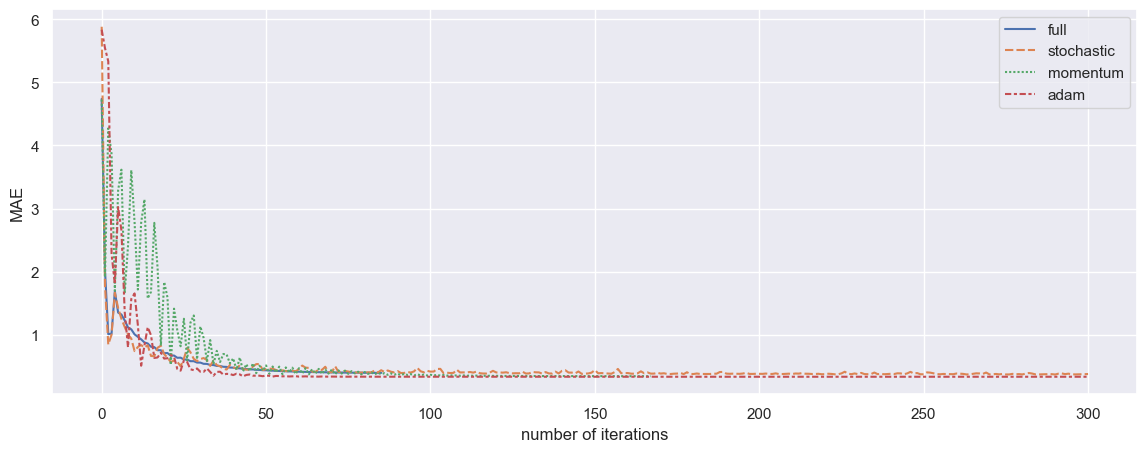

In [53]:
sns.lineplot(loss_history_mae).set(xlabel='number of iterations', ylabel='MAE')

[Text(0.5, 0, 'number of iterations'), Text(0, 0.5, 'Huber')]

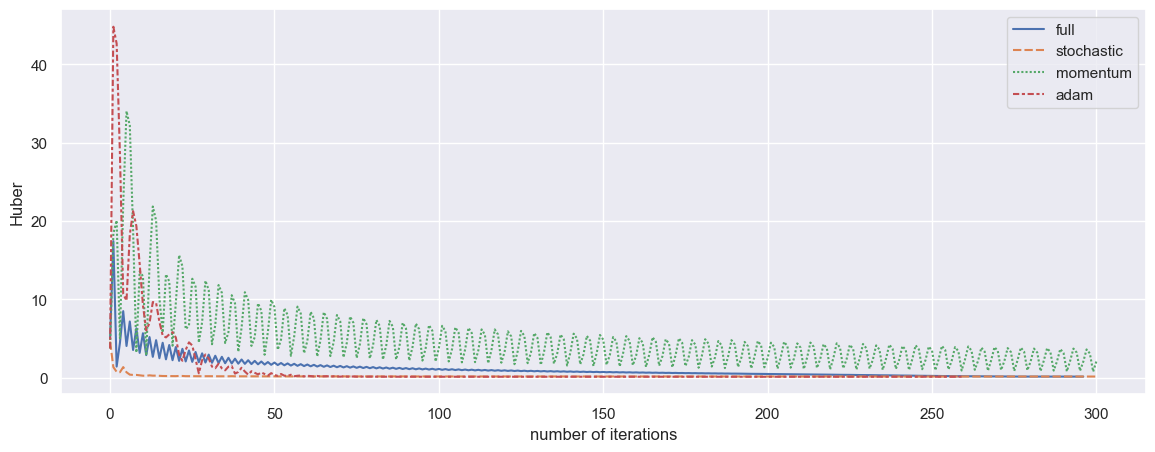

In [54]:
sns.lineplot(loss_history_huber).set(xlabel='number of iterations', ylabel='Huber')

Используя Huber в качестве лосса вместо MSE, получаем лучшее значение $R^2$. MAE выдало качество лучше, чем MSE, но чуть хуже Huber. Но если сравнивать Huber и Log-cosh, то разницы почти нет(оба лосса хороши)